In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [158]:
import seaborn as sns

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [82]:
dfheart = pd.read_csv(r"C:\Users\91918\OneDrive\Desktop\ML datasets\heart.csv")

In [83]:
dfheart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [84]:
dfheart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [85]:
dfheart["target"]

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [86]:
dfheart["target"].unique()

array([0, 1])

### NaN

In [87]:
dfheart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Error Detection

In [88]:
import matplotlib.pyplot as plt

In [89]:
import seaborn as sns

In [90]:
dfheart.shape

(1025, 14)

In [91]:
dfheart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [92]:
cols = ['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [93]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [94]:
import time

In [95]:
for c in cols:
    print(c)
    time.sleep(1)

trestbps
chol
fbs
thalach
oldpeak
ca
thal


In [96]:
for c in cols : 
    print(dfheart[c])
    time.sleep(1)

0       125
1       140
2       145
3       148
4       138
       ... 
1020    140
1021    125
1022    110
1023    110
1024    120
Name: trestbps, Length: 1025, dtype: int64
0       212
1       203
2       174
3       203
4       294
       ... 
1020    221
1021    258
1022    275
1023    254
1024    188
Name: chol, Length: 1025, dtype: int64
0       0
1       1
2       0
3       0
4       1
       ..
1020    0
1021    0
1022    0
1023    0
1024    0
Name: fbs, Length: 1025, dtype: int64
0       168
1       155
2       125
3       161
4       106
       ... 
1020    164
1021    141
1022    118
1023    159
1024    113
Name: thalach, Length: 1025, dtype: int64
0       1.0
1       3.1
2       2.6
3       0.0
4       1.9
       ... 
1020    0.0
1021    2.8
1022    1.0
1023    0.0
1024    1.4
Name: oldpeak, Length: 1025, dtype: float64
0       2
1       0
2       0
3       1
4       3
       ..
1020    0
1021    1
1022    1
1023    0
1024    1
Name: ca, Length: 1025, dtype: int64
0       3

In [97]:
cols

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [98]:
for c in cols : 
    q1 = dfheart[c].quantile(0.25)
    q3 = dfheart[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    dfheart[c] = dfheart[c].map(lambda x : lower if x < lower else   upper  if x > upper else x)

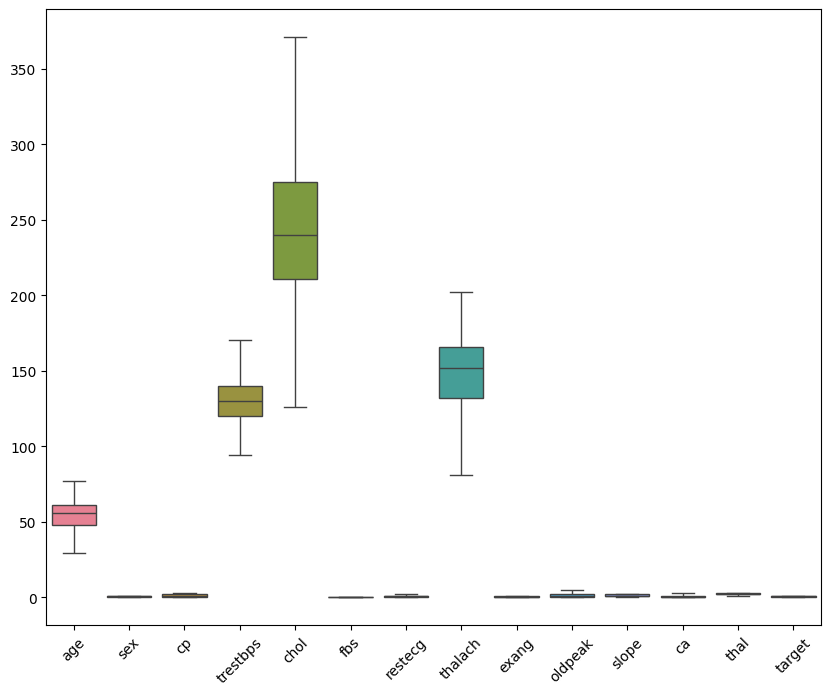

In [99]:
plt.figure(figsize=(10, 8))
sns.boxplot(dfheart)
plt.xticks(rotation = 45)
plt.show()

### Encoding

In [100]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0


In [101]:
dfheart.dtypes

age           int64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs         float64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
target        int64
dtype: object

### Data Separation

In [102]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0


In [103]:
dfheart.drop("target", axis = 1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [104]:
X = dfheart.drop("target", axis = 1)

In [105]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140.0,221.0,0.0,1,164.0,1,0.0,2,0.0,2.0
1021,60,1,0,125.0,258.0,0.0,0,141.0,1,2.8,1,1.0,3.0
1022,47,1,0,110.0,275.0,0.0,0,118.0,1,1.0,1,1.0,2.0
1023,50,0,0,110.0,254.0,0.0,0,159.0,0,0.0,2,0.0,2.0


In [106]:
y = dfheart["target"]

In [107]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

### Imbalance

In [108]:
dfheart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125.0,212.0,0.0,1,168.0,0,1.0,2,2.0,3.0,0
1,53,1,0,140.0,203.0,0.0,0,155.0,1,3.1,0,0.0,3.0,0
2,70,1,0,145.0,174.0,0.0,1,125.0,1,2.6,0,0.0,3.0,0
3,61,1,0,148.0,203.0,0.0,1,161.0,0,0.0,2,1.0,3.0,0
4,62,0,0,138.0,294.0,0.0,1,106.0,0,1.9,1,2.5,2.0,0


In [109]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [110]:
y.value_counts()

target
1    526
0    499
Name: count, dtype: int64

<Axes: xlabel='target'>

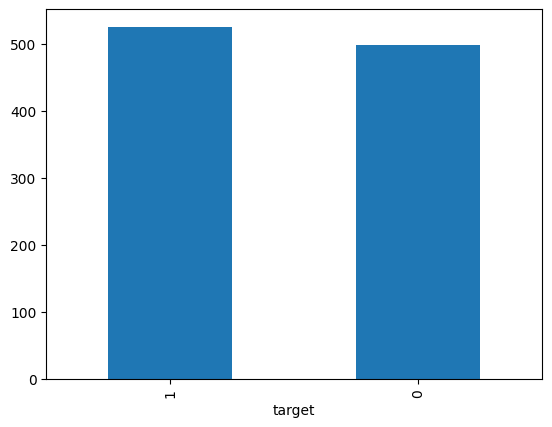

In [111]:
y.value_counts().plot(kind = "bar")

### Data Spliting

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state= 930)

In [114]:
X.shape

(1025, 13)

In [115]:
X_train.shape

(820, 13)

In [116]:
X_test.shape

(205, 13)

In [117]:
y.shape

(1025,)

In [118]:
y_train.shape

(820,)

In [119]:
y_test.shape

(205,)

### Model Building

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
knn_model = KNeighborsClassifier(n_neighbors= 5)

In [122]:
knn_model

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [123]:
knn_model.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [124]:
knn_model.score(X_test, y_test)

0.8439024390243902

### Auto ML

In [125]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [126]:
from sklearn.tree import DecisionTreeClassifier

In [127]:
from sklearn.svm import SVC

In [128]:
from sklearn.linear_model import LogisticRegression

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
rfc_model = RandomForestClassifier()

In [131]:
abc_model = AdaBoostClassifier()

In [132]:
gbc_model = GradientBoostingClassifier()

In [133]:
knn1 = KNeighborsClassifier(n_neighbors= 5)

In [134]:
sv_model = SVC()

In [135]:
lr_model = LogisticRegression()

In [136]:
dt_model = DecisionTreeClassifier()

In [137]:
models = [rfc_model, abc_model, gbc_model, knn1, sv_model, lr_model, dt_model]

In [138]:
models

[RandomForestClassifier(),
 AdaBoostClassifier(),
 GradientBoostingClassifier(),
 KNeighborsClassifier(),
 SVC(),
 LogisticRegression(),
 DecisionTreeClassifier()]

In [139]:
for m in models :
    print(m)
    time.sleep(2)

RandomForestClassifier()
AdaBoostClassifier()
GradientBoostingClassifier()
KNeighborsClassifier()
SVC()
LogisticRegression()
DecisionTreeClassifier()


In [140]:
for m in models :
    m.fit(X_train, y_train)
    sc = m.score(X_test, y_test)
    print(m,"==>",sc)
    print()
    time.sleep(1)

RandomForestClassifier() ==> 1.0

AdaBoostClassifier() ==> 0.9170731707317074

GradientBoostingClassifier() ==> 0.9853658536585366

KNeighborsClassifier() ==> 0.8439024390243902

SVC() ==> 0.7365853658536585

LogisticRegression() ==> 0.8829268292682927

DecisionTreeClassifier() ==> 1.0



### Cross Validation

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
knn2 = KNeighborsClassifier(n_neighbors= 5)

In [143]:
score = cross_val_score(knn2, X, y, cv = 40, n_jobs= -1 )

In [144]:
score

array([0.88461538, 0.80769231, 0.80769231, 0.73076923, 0.80769231,
       0.73076923, 0.69230769, 0.88461538, 0.73076923, 0.84615385,
       0.76923077, 0.73076923, 0.73076923, 0.80769231, 0.76923077,
       0.61538462, 0.96153846, 0.69230769, 0.88461538, 0.88461538,
       0.69230769, 0.84615385, 0.80769231, 0.80769231, 0.76923077,
       0.68      , 0.8       , 0.64      , 0.84      , 0.76      ,
       0.96      , 0.76      , 0.76      , 0.92      , 0.76      ,
       0.68      , 0.8       , 0.56      , 0.68      , 0.84      ])

In [145]:
score.mean()

np.float64(0.7783076923076923)

In [146]:
knn3 = KNeighborsClassifier(n_neighbors=5)

In [147]:
score1 = cross_val_score(knn3, X_train, y_train, cv = 40, n_jobs= -1 )

In [148]:
score1

array([0.76190476, 0.71428571, 0.61904762, 0.66666667, 0.9047619 ,
       0.80952381, 0.66666667, 0.76190476, 0.85714286, 0.61904762,
       0.61904762, 0.52380952, 0.76190476, 0.66666667, 0.76190476,
       0.66666667, 0.57142857, 0.71428571, 0.61904762, 0.76190476,
       0.85      , 0.75      , 0.75      , 0.75      , 0.65      ,
       0.75      , 0.55      , 0.75      , 0.55      , 0.8       ,
       0.6       , 0.75      , 0.85      , 0.85      , 0.85      ,
       0.75      , 0.45      , 0.85      , 0.75      , 0.9       ])

In [149]:
score1.mean()

np.float64(0.7199404761904763)

In [150]:
rfc1 = RandomForestClassifier()

In [151]:
rfc_score = cross_val_score(rfc1, X_train, y_train, cv= 30, n_jobs= -1)

In [152]:
rfc_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [153]:
rfc_score.mean()

np.float64(1.0)

In [154]:
rfc2 = RandomForestClassifier()

In [155]:
rfc_score2 = cross_val_score(rfc2, X, y, cv= 40, n_jobs= -1)

In [156]:
rfc_score2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1.])

In [157]:
rfc_score2.mean()

np.float64(1.0)